# 18.4 Zadanie Fashion-Mnist

#### import niezbednych bibliotek

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle

#### dane które są zaimportowane są już rozdzielone na testowe i treningowe, by móc zastosować train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels) połączymy oba zestawy danych

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images_train, labels_train = train
images_test, labels_test = test

#### Skoro mamy wszytskie dane pod zmienną images, można zastosowac normalizację obrazów oraz stworzyć dodatkowy wymiar niezbedny do szkolenia.

In [3]:
images = np.concatenate((images_train, images_test), axis=0)
images = images/255.0
images = images[..., np.newaxis]

In [4]:
labels =  np.concatenate((labels_train, labels_test), axis=0)
print(images.shape)

(70000, 28, 28, 1)


#### Rozdzielamy dane zgodnie z tereścią zadania

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

#### Tworzymy model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  
    tf.keras.layers.Dense(128, activation='relu'),     
    tf.keras.layers.Dense(64, activation='relu'),     
    tf.keras.layers.Dense(10, activation='softmax')   
])

C:\Users\piotr\anaconda3\envs\condaenv4\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Kompilujemy model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Przygotowujemy się by zapisać model pod określoną ściężką oraz chcemy zapisać tylko najlepszy model

In [8]:
checkpoint_filepath = '/tmp/checkpoint.model.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#### Trenujemy model

In [9]:
model.fit(X_train, y_train, epochs=12, batch_size=64,validation_split=0.1, callbacks=[model_checkpoint_callback])

Epoch 1/12
886/886 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7623 - loss: 0.6922 - val_accuracy: 0.8546 - val_loss: 0.4088
Epoch 2/12
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8580 - loss: 0.3893 - val_accuracy: 0.8752 - val_loss: 0.3483
Epoch 3/12
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8744 - loss: 0.3419 - val_accuracy: 0.8714 - val_loss: 0.3668
Epoch 4/12
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8815 - loss: 0.3194 - val_accuracy: 0.8786 - val_loss: 0.3324
Epoch 5/12
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8907 - loss: 0.2988 - val_accuracy: 0.8816 - val_loss: 0.3261
Epoch 6/12
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8936 - loss: 0.2869 - val_accuracy: 0.8856 - val_loss: 0.3159
Epoch 7/12
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9002 - loss: 0.2690 - val_accuracy: 0.8887 - val_loss: 0.3054
Epoch 8/12
886/886 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8988 - loss: 0.2659 - val_accuracy: 0.

#### Wykorzystujemy najlepszy model do oceny na danych testowych 

In [10]:
best_model = tf.keras.models.load_model(checkpoint_filepath)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8953 - loss: 0.2996
Test Accuracy: 0.8987143039703369


#### Piszemy funkcję która dla najlepszego modelu wyświetli obraz zdefiniowanej wcześniej danej testowej i wyświetli przewidywaną labelkę. W pierszwym kroku zwiększamy ilość wymiarów elementu dla którego chcemy uzyskać przewidywaną labelkę, gdyż wyszkolony model potrzebuje jeszcze batch_size

In [11]:
def predict_and_print(best_model, verified_image):
    verified_image = np.expand_dims(verified_image, axis=0)
    prediction = np.argmax(best_model.predict(verified_image), axis=1)[0]
    plt.imshow(verified_image[0, ...,  0], cmap='grey')
    plt.title(f"Predicted Label: {prediction}")
    plt.axis('off')
    plt.show()
    print("0 	T-shirt/top\n1 	Trouser\n2 	Pullover\n3 	Dress\n4 	Coat\n5 	Sandal")
    print("6 	Shirt\n7 	Sneaker\n8 	Bags\n9 	Ankle boot")

#### Wywołanie funkcji z dowolną daną testową

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


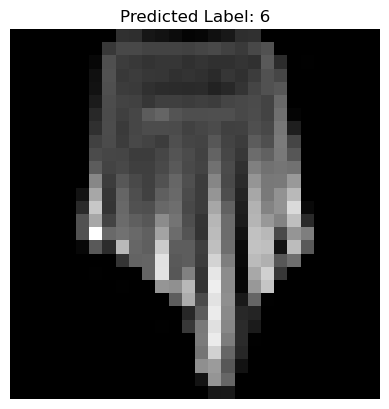

0 	T-shirt/top
1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bags
9 	Ankle boot


In [12]:
verified_image = X_test[0]
predict_and_print(best_model,verified_image)

#### Przechodzimy do zadania zwiększenia ilości próbek w zbiorze treningowym. Będziemy tworzyć obrazy z limitami kontrastu i jasności na poziomie 0.2. Następnie piszemy funkcję która bedzie generować obrazy i zapisywać je do listy. W drugiej liście będą zapisywane labelki obrazów na podstawie których są trzorzone zmodyfikowane obrazy. Funkcja zwraca obie listy. 

In [13]:
augmentations = A.Compose([
    A.RandomBrightnessContrast( contrast_limit=0.2, brightness_limit=0.2, p=0.6),# Zmiana jasności i kontrast
])

X_train, y_train = shuffle(X_train, y_train)

def augment_images(images, labels, augmenter):
    augmented_images = []
    augmented_labels = []
    images_numbers = np.random.randint(int(len(X_train)*0.5), int(len(X_train)*0.7))
    for i in tqdm(range(images_numbers)):
        random_image_idx = np.random.randint(0, len(X_train))
        augmented = augmenter(image=images[random_image_idx])['image']
        augmented_images.append(augmented)
        augmented_labels.append(labels[random_image_idx])
    return np.array(augmented_images), np.array(augmented_labels)

#### Wywołujemy naszą funkcję i listy zwrócone przez naszą funkcję zapisujemy pod dwoma zmiennymi.

In [14]:
augmented_X_train, augmented_y_train = augment_images(X_train, y_train , augmentations)

100%|█████████████████████████████████████████████████████████████████████████| 33338/33338 [00:01<00:00, 26843.93it/s]


#### Dodajemy Obrazy i etykiety które wygenerowaliśmy do pierwotnych danych treningowych

In [15]:
X_train = np.concatenate((X_train, augmented_X_train), axis=0)
y_train =  np.concatenate((y_train, augmented_y_train), axis=0)

#### Przemieszamy dane treningowe, by dane pierwotne nie były brane do analizy w pierszej kolejności

In [16]:
X_train, y_train = shuffle(X_train, y_train)

#### Uczymy zdefiniowany wcześniej model, jednak modyfikujemy ścieżkę zapisu naszego modelu. Takie same pozostałe parametry, tylko danych treningowych mamy teraz więcej 

In [17]:
checkpoint_filepath = '/tmp/checkpoint.model2.keras'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(X_train, y_train, epochs=12, batch_size=64,validation_split=0.1, callbacks=[model_checkpoint_callback])
best_model = tf.keras.models.load_model(checkpoint_filepath)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/12
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9078 - loss: 0.2459 - val_accuracy: 0.9103 - val_loss: 0.2433
Epoch 2/12
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9152 - loss: 0.2237 - val_accuracy: 0.9071 - val_loss: 0.2487
Epoch 3/12
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9218 - loss: 0.2084 - val_accuracy: 0.9193 - val_loss: 0.2121
Epoch 4/12
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9256 - loss: 0.1983 - val_accuracy: 0.9110 - val_loss: 0.2379
Epoch 5/12
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9295 - loss: 0.1897 - val_accuracy: 0.9181 - val_loss: 0.2201
Epoch 6/12
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9320 - loss: 0.1820 - val_accuracy: 0.9151 - val_loss: 0.2294
Epoch 7/12
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9347 - loss: 0.1740 - val_accuracy: 0.9199 - val_loss: 0.2188
Epoch 8/12
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9370 - loss: 0.1659 - 

#### Dzięki agumentacji udało się nieznacznie zwieększyć accuracy naszego modelu. Wykonuje dokładniejszą predykcję dla tych samych danych testowych